회귀는 예측값이 연속형 숫자이다.

대표적인 알고리즘으로 선형/비선형 회귀, 로지스틱 회귀, 의사결정나무(회귀) 등이 있다.

# 1. 단순 선형 회귀분석을 이용한 예측 

## 1) 단순 선형 회귀분석 알고리즘
* 한 개의 종속변수와 한 개의 독립변수로 구성된 선형 회귀이다.
* 실제값과 예측한 값과의 차이를 잔차라고 하고 잔차의 합ㅇ이 최소가 되는 최적의 회귀 계수를 찾아내는 것이 회귀모델의 목표이다.
* 잔차의 제곱합을 최소로 하는 최소제곱법을 이용하여 잔차의 합이 최소가 되는 모델을 만든다.


## 2) 단순 선형 회귀를 이용한 분석 수행 

### (1) 필요 패키지 임포

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

### (2) 데이터 불러오기 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

### (3) 데이터 살펴보기 & 변수 선택 

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


horsepower 변수에 2개의 결측값이 있음 

> 선형관계가 있는지 시각화
* Matplotlib 의 plot() 메소드에 kind="scatter" 옵션으로 산점도 그리기 

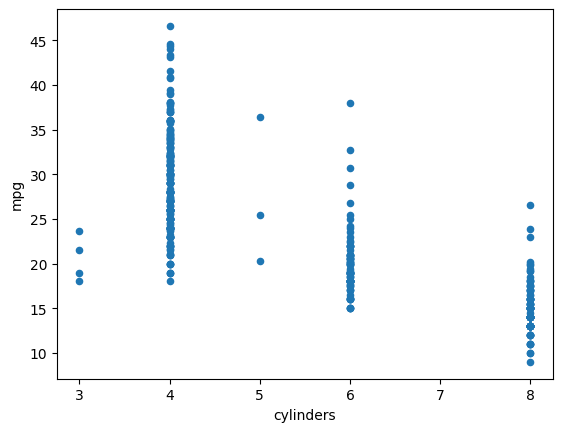

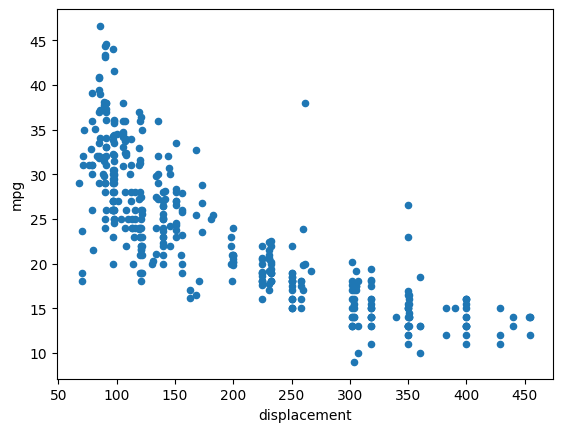

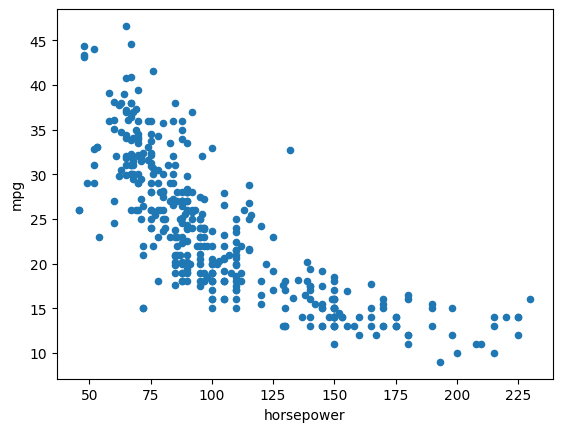

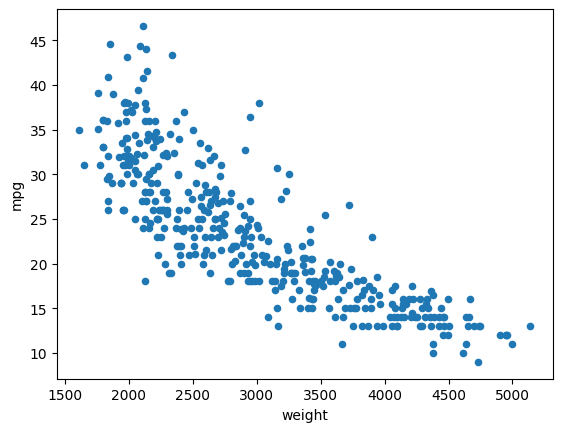

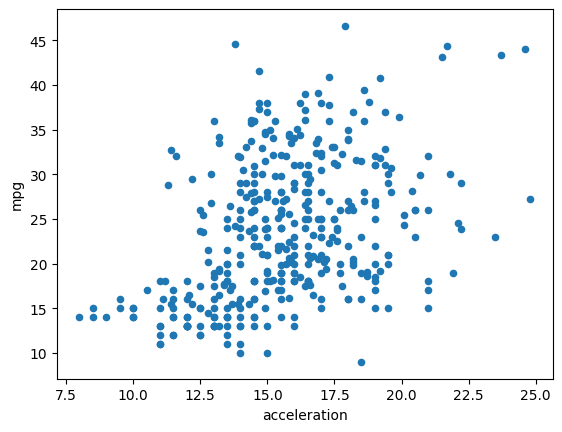

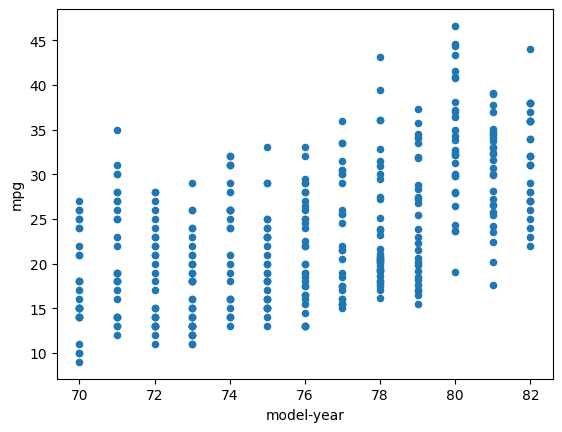

In [ ]:
df.plot(kind="scatter", y="mpg", x="cylinders")
plt.show()

df.plot(kind="scatter", y="mpg", x="displacement")
plt.show()

df.plot(kind="scatter", y="mpg", x="horsepower")
plt.show()

df.plot(kind="scatter", y="mpg", x="weight")
plt.show()

df.plot(kind="scatter", y="mpg", x="acceleration")
plt.show()

df.plot(kind="scatter", y="mpg", x="model-year")
plt.show()

### (4) 데이터 전처리

* horsepower 칼럼의 결측 처리(삭제) 

In [ ]:
df = df.dropna(axis=0)

### (5) 분석 데이터셋 준비 

In [ ]:
X = df[["weight"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 1)
(80, 1)
(316,)
(80,)


### (6) 데이터터분석 수행 

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("기울기: ", lr.coef_)
print("y 절편: ", lr.intercept_)

기울기:  [-0.00770148]
y 절편:  46.38407237826462


$$mpg = 46.384 - 0.0077 \cdot weight$$ 라는 회귀식을 만들 수 있다. 

In [ ]:
pred = lr.predict(X_test)

### (7) 성능평가 및 시각화 

* 선형회귀의 평가는 결정계수인 $R^2$ 점수로 예측 정확도를 판단할 수 있다.

In [ ]:
from sklearn.metrics import r2_score
# 테스트 데이터 대상으로
score = r2_score(y_test, pred)
print(score)

lr.score(X_test, y_test)

0.6934936031826195


0.6934936031826195

In [ ]:
# 훈련 데이터 대상으로
print(r2_score(y_train, lr.predict(X_train)))
lr.score(X_train, y_train)

0.6926394631572237


0.6926394631572237

## 3) 추가 작업 해보기


### (1) 단순 선형 회귀를 이용한 분석 - horsepower 변수 

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")

df = df.dropna(axis=0)

X = df[["horsepower"]]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("기울기: ", lr.coef_)
print("절편: ", lr.intercept_)

pred = lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, pred)

기울기:  [-0.15642129]
절편:  39.706980196711555


0.6443158074875136

### (2) 상관관계 분석 

In [ ]:
corr = df.corr(method="pearson")
print(corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775680     -0.804711   -0.777575 -0.832725   
cylinders    -0.775680   1.000000      0.950706    0.843751  0.896058   
displacement -0.804711   0.950706      1.000000    0.897787  0.932729   
horsepower   -0.777575   0.843751      0.897787    1.000000  0.864350   
weight       -0.832725   0.896058      0.932729    0.864350  1.000000   
acceleration  0.421159  -0.504844     -0.542713   -0.687241 -0.415462   
model-year    0.581144  -0.352554     -0.374620   -0.420697 -0.311774   

              acceleration  model-year  
mpg               0.421159    0.581144  
cylinders        -0.504844   -0.352554  
displacement     -0.542713   -0.374620  
horsepower       -0.687241   -0.420697  
weight           -0.415462   -0.311774  
acceleration      1.000000    0.294588  
model-year        0.294588    1.000000  


# 2. 다중 선형 회귀분석을 이용한 예측 

## 1) 다중 선형 회귀분석 알고리즘 
* 여러개의 독립변수를 사용한 회귀분석
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots$$

## 2) 다중 선형 회귀를 이용한 분석 수행 

### (1) 필요 패키지 임포트 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

### (2) 데이터 불러오기 

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

### (3) 데이터 살펴보기 

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms 칼럼에 결측이 존재함  

### (4) 데이터 전처리 

In [ ]:
df.total_bedrooms.isna().sum() / df.shape[0]

0.01002906976744186

* total_bedrooms 의 결측은 전체의 1% 정도이기 때문에 삭제
* ocean_proximity는 범주형 변수이기 때문에 제거하고 분석 진행 

In [ ]:
df = df.dropna(axis=0)

df = df.drop("ocean_proximity", axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


* 변수들 간의 상관분석 
    * median_income 과 median_house_value 의 상관계수가 높다. 

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


### (5) 분석 데이터 준비 

In [ ]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


### (6) 데이터분석 수행 

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(lr.coef_, index=X_train.columns)

,0
longitude,-42448.539246
latitude,-42300.176298
housing_median_age,1185.201182
total_rooms,-8.969455
total_bedrooms,112.024239
population,-35.119298
households,45.230679
median_income,40470.941654


In [ ]:
pred = lr.predict(X_test)

### (7) 성능평가 및 시각화 

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

# lr.score(X_test, y_test)

0.6370442278877567


In [ ]:
lr.score(X_train, y_train)

0.6365479765497755

# 3. 의사결정나무를 이용한 예측 

## 1) 의사결정나무 알고리즘 
> 특징
* 수학적 지식 없어도 결과를 해석하고 이해하기 쉽다.
* 수치 데이터 및 범주 데이터에 모두 사용 가능.
* 과대 적합의 위험이 높기 때문에 학습모델이 과대적합되지 않도록 적절히 조절 필요 

## 2) 의사결정나무를 이용한 분석 수행 

### (1) 필요 패키지 임포트 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

### (2) 데이터 불러오기 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

### (3) 데이터 살펴보기 

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* total_bedrooms 칼럼에 결측 존재
* ocean_proximity 컬럼은 범주형 변수이므로 형변환이나 분석에서 제외 

### (4) 데이터 전처리 

* total_bedrooms 칼럼의 결측은 207개로 전체 데이터터가 많기 때문에 제거해도 무방할 것으로 보임
* ocean_proximity 는 범주형 값이므로 분석에서 제외 

In [6]:
df = df.dropna(axis=0)

df = df.drop("ocean_proximity", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


* 상관분석 

In [11]:
corr = df.corr(method="pearson")
corr.style.background_gradient(cmap="RdBu_r")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


종속변수인 median_house_value와 상관성이 높은 변수는 median_income이다. 

### (5) 분석 데이터셋 준비 

In [12]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


### (6) 데이터 분석 수행 

In [17]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=123)
dtr.fit(X_train, y_train)

pred = dtr.predict(X_test)

### (7) 성능평가 및 시각화 

* 의사결정나무 분석의 평가는 평균제곱오차(MSE)로 예측 정확도를 판단.
* MSE가 작을수록 모형의 예측 능력이 좋다고 판단. 

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6838934608.208298


-> 다른 모형들을 구현하여 함께 비교할 필요가 있음 

* 학습 데이터셋에 대해서도 평가 

In [19]:
mean_squared_error(y_train, dtr.predict(X_train))

6655193561.431521

# 4. 랜덤 포레스트를 이용한 예측 문제 해결 

## 1) 랜덤 포레스트 알고리즘 
> 특징
* 다양한 분야에 비교적 좋은 성능
* 모델의 편향을 증가시켜 과적합 위험 감소
* 트리들이 조금씩 다른 특성을 갖게 되어 일반화 성능을 향상
* 샘플링을 하는 과정에서 한 샘플이 중복되어 추출될 수 있음
* 기본 매개변수 설정만으로 좋은 결과를 얻을 수 있음
* 랜덤 포레스트의 중요도는 각 트리의 특성 중요도를 취합한 것 

## 2) 랜덤 포레스트를 이용한 분석 수행 

### (1) 필요 패키지 임포트 

In [27]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

### (2) 데이터 불러오기 

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

### (3) 데이터 살펴보기 

In [24]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* total_bedrooms 결측 존재
* ocean_proximity 는 범주형 자료 

### (4) 데이터 전처리 

* total_bedrooms의 결측은 많지 않으므로 행 제거
* ocean_proximity 는 분석에서 제외 

In [26]:
df = df.dropna(axis=0)

df = df.drop("ocean_proximity", axis=1)

* 상관계수 

<Axes: >

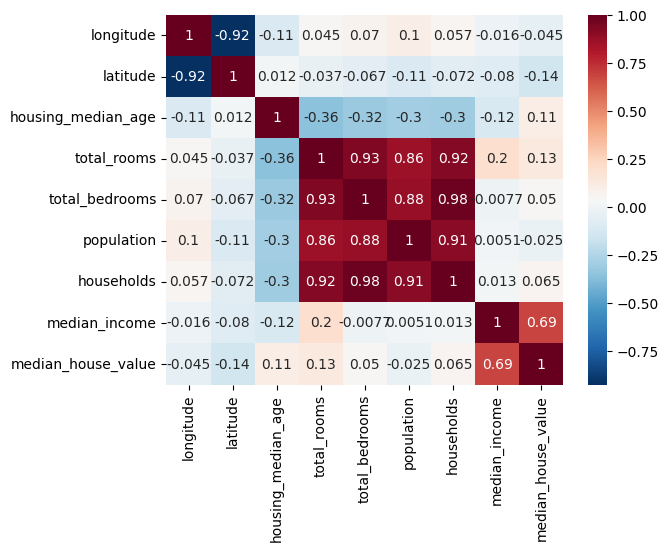

In [32]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu_r")

### (5) 분석 데이터셋 준비


In [36]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


### (6) 데이터터분석 수행 

In [38]:
rfr = RandomForestRegressor(max_depth=3, random_state=123)
rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)

### (7) 성능평가 및 시각화

* 랜덤 포레스트 분석의 평가는 MSE로 예측 정확도를 판단할 수 있다.
* MSE 값이 작을수록 모형의 예측 능력이 좋다고 할 수 있다. 

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print(mse)

6435315330.429489


-> 의사결정트리 보다 약간 낮은 값 

* 학습 데이터셋에 대해서도 예측 수행 

In [40]:
mean_squared_error(y_train, rfr.predict(X_train))

6330721688.457054